# Elements In Langgraph:
- State
- Node
- Edges
- Graph
- Tool
- ToolNode
- StateGraph
- Runnable
- Message

## 1. State
- Holds current information / context of application.
- Application internal memory, keeps track of variables, data nodes.

## 2. Node:
- Individual functions or operations that perform task in a graph.
- Each node **recieves input, processes it and updates state.**

## 3. Edges
- Connection between nodes that determines execution of flow.
- Tells which node should be executed next.

Note there's a special type of edge called **conditional edge** which is specialized in deciding which node to **pick next based on logic applied to it using current state.**

- **START:** entry point in LangGraph.
- **END:** exit point in LangGraph.

## 4. Graph
- An structure that maps out how different nodes (tasks) are connected and executed.
- Visually represents a sequence and paths between various operations.

## 5. Tool
- Specialized function or utility that node can utilize to perform tasks.
- Task can be: calling an api, updating data tables.
- **Nodes are part of graph structure, while tools are functionality used within a node.**

## 6. ToolNode
- **Special Kind Of Node, whose main job is to run a tool.**
- Connects tool output back into State, so other node can use the info.
| Concept       | Description                                                                                                                                                                |
| ------------- | -------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **Tool**      | A callable function the AI can use, like `get_weather()` or `search_web()`.                                                                                                |
| **Tool Node** | A node in the LangGraph that handles **tool execution**. It looks for tool calls in the messages, executes the matching tool, and returns a `ToolMessage` with the result. |

**When is Tool Node Used?**
- During an agent's reasoning, it may decide to:
- Call a tool
- Wait for the tool result
- Resume thinking using that result

**Example:**

```python
from langgraph.graph import StateGraph
from langgraph.prebuilt import tool_node
from langchain_core.messages import HumanMessage
from langchain_core.tools import tool

@tool
def double(x: int) -> int:
    return x * 2

tools = [double]
executor = ToolExecutor(tools)

graph = StateGraph()
graph.add_node("tool_call", tool_node(executor))
graph.set_entry_point("tool_call")

initial_state = {
    "messages": [
        HumanMessage(content="Double 4."),
        AIMessage(content="", tool_calls=[{
            "name": "double",
            "args": {"x": 4},
            "id": "tool1"
        }])
    ]
}

app = graph.compile()
output = app.invoke(initial_state)

for msg in output["messages"]:
    print(type(msg).__name__, ":", msg.content)
```

## 7. StateGraph
- A class in langchain used to build and compile graph structure.
- Manages nodes, edges and overall state, ensuring workflow operates in a unified way and data flows correctly between different components.

## 8. Runnable
- Standarized executable in Langgraph that performs a specific task within an AI workflow.
- Allows creating a modular system.
- implements the ``invoke()`` method.

| Concept    | What it Is                | Example                                | Role in LangGraph                       |
| ---------- | ------------------------- | -------------------------------------- | --------------------------------------- |
| `Node`     | Named step in the graph   | `graph.add_node("classify", runnable)` | Represents a logical operation in graph |
| `Runnable` | Callable with `.invoke()` | `RunnableLambda(fn)`, `LLMChain`, etc. | Implements the logic that a node runs   |


## 9. Message:
- **HumanMessage:** Represents user input in a chat.
- **AIMessage:** Represents a response from the AI assistant (e.g., GPT, Mistral, Claude).
- **SystemMessage:** Provides instructions or context to the AI.
- **ToolMessage:** Returned by the system after calling a tool (e.g., calculator, web search).
- **FunctionMessage:** Represents a function's return output, often used with OpenAI tool-calling models. (Depreciated)


In [1]:
from langchain_core.messages import AIMessage
from langchain_core.messages import ToolMessage
from langchain_core.messages import FunctionMessage
from langchain_core.messages import SystemMessage
from langchain_core.messages import HumanMessage

msgs = [
    SystemMessage(content="You are a calculator."),
    HumanMessage(content="What is 5 * 6?"),
    AIMessage(content="Let me calculate that..."),
    ToolMessage(tool_call_id="multiply_1", content="30"),
    AIMessage(content="The answer is 30.")
]

## Example LangGraph Graph:

In [2]:
from typing import Dict, TypedDict
from langgraph.graph import StateGraph


# State
class AgentState(TypedDict):
    """State"""
    message: str

# Node: Accepts state -> Return Updated One
def greet_user(state: AgentState) -> AgentState:
    """Simple node that greets a user"""
    state["message"] = "Heyy there" + state["message"]
    return state

# Graph Initialized
graph = StateGraph(AgentState)

# Adding A node
graph.add_node("greet", greet_user)

# entry point and exit point
graph.set_entry_point("greet")
graph.set_finish_point("greet")

Compile a graph now

In [3]:
# compile graph
app = graph.compile()

Graph Preview

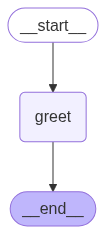

In [4]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

Run a graph

In [5]:
result = app.invoke({"message": "Bob"})
result

{'message': 'Heyy thereBob'}